In [316]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [317]:
#reading data

data=pd.read_csv(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\Group13\Classification\NLS_Group13.txt",header=None,delimiter="\s+",skiprows=1)

In [318]:
data.head()

,0,1
0,7.571705,-8.756260
1,-8.962906,0.459065
2,9.445356,-7.170082
3,0.191872,2.211127
4,-8.807716,-1.548033


In [319]:
print(data.shape)

(2606, 2)


In [320]:
data_class1=data.iloc[:1303]
data_class2=data.iloc[1304::]

In [321]:
print(data_class1.shape)
print(data_class1.shape)

(1303, 2)
(1303, 2)


In [322]:
#Splitting data into train-test proportion of 70-30

def split_data(data):
    m,n=data.shape
    k=int(0.7*m)
    training_data=data.iloc[:k]
    test_data=data.iloc[k:m]
    
    return training_data, test_data

In [323]:
train1, test1=split_data(data_class1)
train2, test2=split_data(data_class2)

In [324]:
print(train1.shape,test1.shape)

(912, 2) (391, 2)


[]

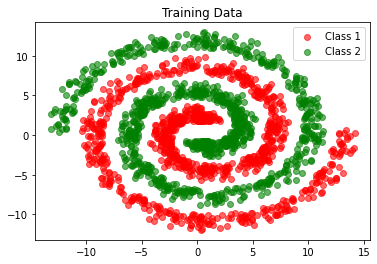

In [325]:
#Plotting training data

plt.scatter(train1[0],train1[1],color='r',alpha=0.6,label='Class 1')
plt.scatter(train2[0],train2[1],color='g',alpha=0.6,label='Class 2')
plt.legend()
plt.title("Training Data")
plt.savefig(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\NLS_results\Part1_Q2_train_data.png")
plt.plot()

In [326]:
# Training model
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [327]:
def perceptron(data,epoch=100,eta=0.001,track_performance=False):
    """
    Implement perceptron algorithm on data for given number of epochs.
    params:
    """
    m,n=data.shape
    w=np.array([0,0,0])    # initializing weights to zero vector
    error=[]               # list of errors for each example in each epoch
    avg_error=[]           # list of average error for each epoch
    
    for j in range(epoch):
        for i in range(m):
            x_i=[1,data.iloc[i,0],data.iloc[i,1]]
            if i<int(m/2):
                y_i=0
            else:
                y_i=1
            
            a_i=np.dot(w.T,x_i)    #activation value
            s_i=sigmoid(a_i)

            # calculate error
            
            e=(1/2)*(y_i-s_i)**2
            error.append(e)
            
            # calculate gradient and update weights
            
            del_w=np.dot(eta*(y_i-s_i)*s_i*(1-s_i),x_i)
            w=w+del_w
        avg_e=sum(error)/len(error)
        avg_error.append(avg_e)
        
        if track_performance==True:
            print("Epoch: ",j+1,end="\t")
            print("Error: ",avg_e)
        epoch-=1
    final_error=avg_e     # final error after convergence criterion meets
    
    return w,avg_error,final_error

In [328]:
# Training using one-against-one approach
# Preparing combined train data

train12=train1.append(train2,ignore_index=True)

print("Train class 1 and 2")
w12,avg_error12,final_error12=perceptron(train12,epoch=500,eta=0.0001,track_performance=False)

Train class 1 and 2


In [329]:
print('For class 1 and 2:\n')
print('Weights:{} \t Error:{}'.format(w12,final_error12))

For class 1 and 2:

Weights:[-0.0402868   0.00664165  0.09238764] 	 Error:0.11739848619819075


In [330]:
# Testing unseen data
def test_model(test,w):
    
    m,n=test.shape
    y=[]                 #output
    for i in range(m):
        x_i=[1,test.iloc[i,0],test.iloc[i,1]]
        a_i=np.dot(w.T,x_i)
        s_i=sigmoid(a_i)
        
        if s_i>0.5:
            y_i=1
        else:
            y_i=0
        y.append(y_i)
    return y

In [331]:
# Classifying test data using one-against-one approach
test12=test1.append(test2,ignore_index=True)

In [332]:
y12=test_model(test12,w12)

In [333]:
# Plotting decision boundary
x_min=min([min(data_class1.iloc[0]),min(data_class2.iloc[0])])
x_max=max([max(data_class1.iloc[0]),max(data_class2.iloc[0])])
y_min=min([min(data_class1.iloc[1]),min(data_class2.iloc[1])])
y_max=max([max(data_class1.iloc[1]),max(data_class2.iloc[1])])

xx, yy = np.meshgrid(np.arange(x_min-15, x_max+15, 0.1), np.arange(y_min-15, y_max+15, 0.1))
meshgrid=np.c_[xx.ravel(),yy.ravel()]       # flatten meshgrid and concatenate to create points

In [334]:
def decision_region(meshgrid,data1,data2,weights,class_label):
    
    c1=[];c2=[]
    
    # compute output for complete mesh
    meshgrid=pd.DataFrame(meshgrid)
    y_pred=test_model(meshgrid,weights)
    m,n=meshgrid.shape
    
    for i in range(m):
        if y_pred[i]==0:
            c1.append((meshgrid.iloc[i,0],meshgrid.iloc[i,1]))
            
        else:
            c2.append((meshgrid.iloc[i,0],meshgrid.iloc[i,1]))
    
    c1=np.array(c1)
    c2=np.array(c2)
    
    plt.scatter(c1[:,0],c1[:,1],color='coral',label="Region "+str(class_label[0]))
    plt.scatter(c2[:,0],c2[:,1],color='lightskyblue',label="Region "+str(class_label[1]))
    plt.scatter(data1[0],data1[1],color='red',edgecolors='black',alpha=0.6,label="Class "+str(class_label[0]))
    plt.scatter(data2[0],data2[1],color='steelblue',edgecolors='black',alpha=0.6,label="Class "+str(class_label[1]))
    plt.legend(loc="best")
    plt.title("Class "+str(class_label[0])+" V/S Class "+str(class_label[1]))
    plt.savefig(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\NLS_results\Part1_Q1_decision_boundary"+str(class_label[0])+str(class_label[1])+".png")
    plt.show()

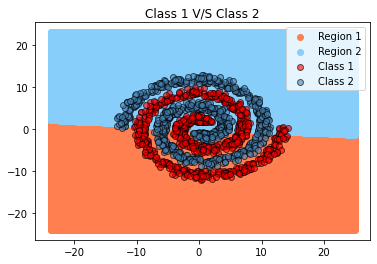

In [335]:
decision_region(meshgrid,train1,train2,w12,class_label=[1,2])

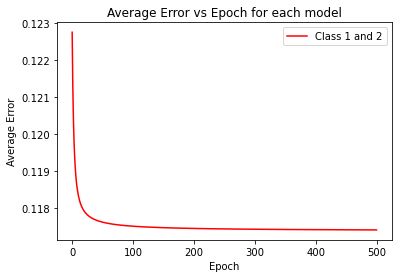

In [336]:
# plotting average error v/s epoch

plt.plot(avg_error12,label='Class 1 and 2',color='red')
plt.legend()
plt.title("Average Error vs Epoch for each model")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.savefig(r"C:\Users\PRACHI\OneDrive\Desktop\CS671\Assignment_1\NLS_results\Part1_Q2_avg_error.png")
plt.show()

In [337]:
# Confusion matrix for test data

def confusion_matrix(predicted):
    c11,c22=0,0
    n=int(len(predicted)/2)
    for i in range(2*n):
        if i<int(n) and predicted[i]==0:
            c11+=1
        elif i>=int(n) and predicted[i]==1:
            c22+=1
    mat=np.array([[c11,n-c11],[n-c22,c22]])
    return mat

In [338]:
def multiclass_confusion_matrix(mat12,mat23,mat13):
    c11=mat12[0][0]+mat13[0][0]
    c12=mat12[0][1]
    c13=mat13[0][1]
    
    c21=mat12[1][0]
    c22=mat12[1][1]+mat23[0][0]
    c23=mat23[0][1]
    
    c31=mat13[1][0]
    c32=mat23[1][0]
    c33=mat13[1][1]+mat23[1][1]
    
    mat=np.array([[c11,c12,c13],[c21,c22,c23],[c31,c32,c33]])
    
    return mat

In [339]:
conf_mat12=confusion_matrix(y12)

In [340]:
print("Confusion Matrix for 2-class classification for non linearly seperable classes")
print(conf_mat12)

Confusion Matrix for 2-class classification for non linearly seperable classes
[[198 193]
 [189 202]]


In [341]:
#Classification accuracy

def accuracy(x1,x2,total):
    return ((x1+x2)/total)*100

In [352]:
#Precision for a classifier

def precision(TP,FP):
    return TP/(TP+FP)*100

In [343]:
acc=accuracy(conf_mat12[0][0],conf_mat12[1][1],len(y12))
print("Accuracy of model: ",acc)

Accuracy of model:  51.150895140664964


In [353]:
precision1=precision(conf_mat12[0][0],conf_mat12[0][1])
precision2=precision(conf_mat12[1][1],conf_mat12[1][0])

In [354]:
print("Precision of class 1: ",(precision1))
print("Precision of class 2: ",(precision2))

Precision of class 1:  50.63938618925832
Precision of class 2:  51.66240409207161


In [355]:
# recall for a classifier

def recall(TP,FN):
    return TP/(TP+FN)*100

In [356]:
recall1=recall(conf_mat12[0][0],conf_mat12[1][0])
recall2=recall(conf_mat12[1][1],conf_mat12[0][1])

In [357]:
print("Recall for class 1:",recall1)
print("Recall for class 2:",recall2)

Recall for class 1: 51.162790697674424
Recall for class 2: 51.13924050632911


In [349]:
# F-measure of a classifier
def f_measure(precision,recall):
    return 2*precision*recall/(precision+recall)

In [350]:
f1=f_measure(precision1,recall1)
f2=f_measure(precision2,recall2)

In [351]:
print("F-measure for class1: ",f1)
print("F-measure for class2: ",f2)

F-measure for class1:  0.5089974293059126
F-measure for class2:  0.5139949109414759
